In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
x_train.shape, x_test.shape

((25000, 20), (25000, 20))

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
model = Sequential()
model.add(Embedding(max_features,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
625/625 [==============================] - 5s 2ms/step - loss: 0.6693 - acc: 0.6192 - val_loss: 0.6206 - val_acc: 0.6916
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5451 - acc: 0.7455 - val_loss: 0.5277 - val_acc: 0.7292
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4666 - acc: 0.7822 - val_loss: 0.5025 - val_acc: 0.7426
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4281 - acc: 0.8056 - val_loss: 0.4948 - val_acc: 0.7498
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4022 - acc: 0.8205 - val_loss: 0.4942 - val_acc: 0.7524
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3810 - acc: 0.8310 - val_loss: 0.4957 - val_acc: 0.7560
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3618 - acc: 0.8415 - val_loss: 0.5009 - val_acc: 0.7550
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

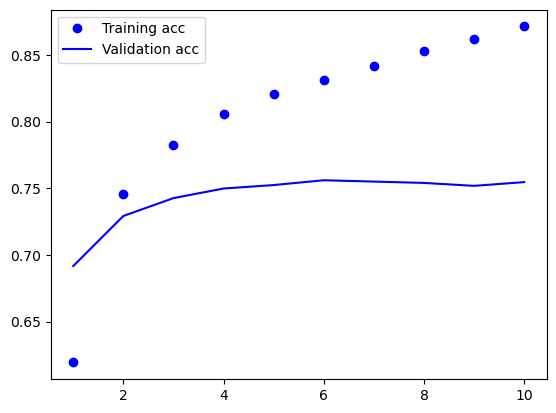

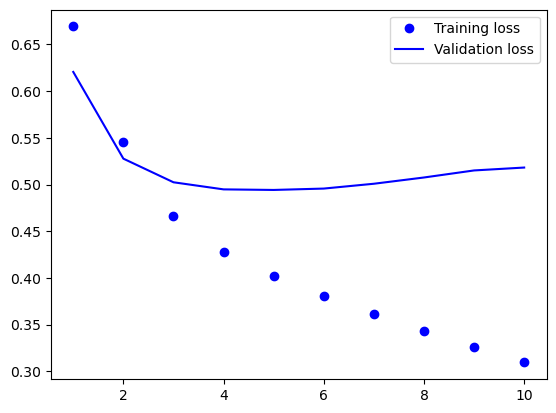

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()
plt.show()
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()
plt.show()
